In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import random
from sklearn.feature_extraction import text
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

In [5]:
#Setting random seed
np.random.seed(42)
random.seed(42)

# Loading all 20 categories dataet
news_dataset = fetch_20newsgroups(subset='all')
                        
print(type(news_dataset))
print(news_dataset.keys())


<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [6]:
print(len(news_dataset.filenames))
print(len(news_dataset.data))

11314
11314


In [148]:
# Loads data from news group
# based on categories as parameter
def load_data(categories):
    dataset = fetch_20newsgroups(subset = 'all', categories = categories,shuffle = True, random_state = None)
    return dataset

In [132]:
def create_stopwords():
    """stop_words_skt = text.ENGLISH_STOP_WORDS
    # nltk.download('stopwords')
    stop_words_en = stopwords.words('english')

    print("# of stop_words_skt:\t\t %s" % len(stop_words_skt))
    print("# of stop_words_en:\t\t %s" % len(stop_words_en))

    print("# of punctuation:\t\t %s" % len(punctuation))
    combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
    print("# of combined_stopwords:\t %s" % len(combined_stopwords))"""
    combined_stopwords=set(punctuation)
    return combined_stopwords

In [133]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
combined_stopwords = create_stopwords()
analyzer = CountVectorizer().build_analyzer()
wnl = nltk.wordnet.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrutisharan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shrutisharan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shrutisharan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shrutisharan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [149]:
categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics','comp.sys.mac.hardware', 'comp.os.ms-windows.misc','rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey']
dataset = load_data(categories)

In [150]:
print(len(dataset))

5


In [152]:
count_vect = CountVectorizer(min_df=3,analyzer='word', stop_words= 'english')
X_counts = count_vect.fit_transform(dataset.data)
print(X_counts.shape)
# print(count_vect.get_feature_names())


# Calculating the TF-IDF matrix for train and test data
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)


(7882, 27768)
(7882, 27768)


In [154]:
#Combining Data into Two categories
from copy import deepcopy
y= dataset.target

labels = deepcopy(y)
labels[y<=3] = 0
labels[y>=4] = 1

print(np.unique(labels))
print(labels.shape)


[0 1]
(7882,)


In [155]:
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init =30)
kmeans.fit(X_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [156]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [157]:
kmeans.cluster_centers_


array([[2.46372095e-03, 2.02728826e-03, 6.74521694e-05, ...,
        2.15642054e-04, 1.26643794e-04, 3.29784654e-05],
       [2.96858366e-03, 2.10188800e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.75007375e-04, 3.53743752e-04]])

In [158]:
from sklearn import metrics

In [160]:
homogeneity_score1=metrics.cluster.homogeneity_score(labels, kmeans.labels_)
completeness_score1=metrics.cluster.completeness_score(labels, kmeans.labels_)
v_measure_score1=metrics.cluster.v_measure_score(labels, kmeans.labels_)
adjusted_rand_score1=metrics.cluster.adjusted_rand_score(labels, kmeans.labels_)
adjusted_mutual_info_score1=metrics.cluster.adjusted_mutual_info_score(labels, kmeans.labels_)
contingency_matrix=metrics.cluster.contingency_matrix(labels, kmeans.labels_)

print(homogeneity_score)
print(completeness_score)
print(v_measure_score)
print(adjusted_rand_score)
print(adjusted_mutual_info_score)
print(contingency_matrix)


0.22670866289535824
0.31568464410721714
0.26389869726694254
0.1483307125257126
0.22653137845316712
[[3899    4]
 [2262 1717]]


/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [161]:
# Dimension reduction using truncatedSVD
def dimension_reduction_SVD(X_tfidf):
    svd = TruncatedSVD(n_components=1000)
    X_reduced = svd.fit_transform(X_tfidf)
    #print(svd.explained_variance_ratio_)
    variance_ratios=svd.explained_variance_ratio_
    print(variance_ratio)
    #print(X_reduced.shape)
    #print("LSI mean squared residual :", np.sum(np.array(X_train - X_train_reduced.dot(svd.components_))**2))
    return X_reduced, variance_ratios

In [162]:

X_reduced_svd, variance_ratios = dimension_reduction_SVD(X_tfidf)


0.5927525720045513


In [163]:
variance_ratio_accumulator=[]
variance_ratio_sum=0.0
for i in range(1000):
    #print("ratio:",variance_ratios[i])
    variance_ratio_sum+=variance_ratios[i]*100
    #print("sum:" ,variance_ratio_sum)
    variance_ratio_accumulator.append(variance_ratio_sum)
print(variance_ratio_accumulator)

[0.11985548783460247, 0.6365003147802469, 1.0007957011766884, 1.3566958110966305, 1.6776144339013823, 1.9328026339334856, 2.1822496702922396, 2.4233174842881287, 2.654564785808033, 2.8728569639661594, 3.0885396594977825, 3.298435842780431, 3.502159324228719, 3.7016649612455077, 3.898986666891682, 4.091561641336566, 4.282592816470045, 4.468985287152463, 4.653022116525133, 4.833204664735422, 5.010416783980271, 5.18184862602784, 5.350397913091634, 5.5171851711629705, 5.682802301294438, 5.847277728870336, 6.007232894222537, 6.166224425180237, 6.323674463458726, 6.478952932705189, 6.6327698443860665, 6.784702772578333, 6.9349025704991165, 7.083077103462071, 7.229888475015168, 7.37596596131345, 7.521633151005027, 7.665717839067502, 7.808274742839661, 7.948125097974453, 8.087494202584399, 8.225733828531764, 8.362371581691876, 8.497885537235593, 8.631281749350826, 8.76451578743744, 8.8964607927244, 9.026995532289673, 9.157209026420775, 9.286643369817106, 9.415237098991513, 9.54350539830733, 9.

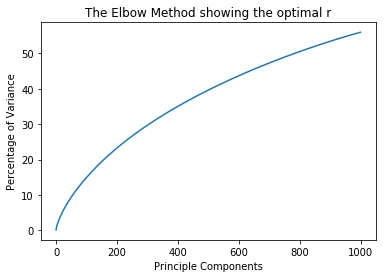

In [164]:
dim=range(1000)
plt.plot(dim, variance_ratio_accumulator)
plt.xlabel('Principle Components')
plt.ylabel('Percentage of Variance')
plt.title('The Elbow Method showing the optimal r')
plt.show()